In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor


In [2]:
data = pd.read_csv('Data.csv')


In [3]:
data.head()


,Cutting speed (rpm),Feed rate (mm/min),Radial depth of cut(mm),Tool wear\nTWmax
0,200,100,1.5,0.379
1,200,150,1.5,0.424
2,200,50,1.0,0.360
3,200,100,1.0,0.415
4,200,150,1.0,0.386


In [4]:
data.columns


Index(['Cutting  speed (rpm)', 'Feed rate (mm/min)', 'Radial depth of cut(mm)',
       'Tool wear\nTWmax'],
      dtype='object')

In [5]:
data.isnull().sum()


Cutting  speed (rpm)       0
Feed rate (mm/min)         0
Radial depth of cut(mm)    0
Tool wear\nTWmax           0
dtype: int64

In [6]:
X=data.drop(['Tool wear\nTWmax'], axis=1)


In [7]:
y=data['Tool wear\nTWmax']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [12]:
clf = TabNetRegressor()
clf.fit(X_train.values.reshape(-1,1), y_train)

Device used : cpu


ValueError: Targets should be 2D : (n_samples, n_regression) but y_train.shape=(80,) given.
Use reshape(-1, 1) for single regression.

In [83]:
print('Accuracy score on Test data= {:.4f}'.format(clf.score(X_test, y_test)))
scores = cross_val_score(clf, X, y, cv=5)
print(scores)

Accuracy score on Test data= 1.0000
[1. 1. 1. 1. 1.]


In [64]:
pred=tree_regressor.predict(X_test)
comparison=pd.DataFrame()


In [65]:
comparison['True Tool wear\nTWmax']=y_test
comparison['Predicted Tool wear\nTWmax']=pred

In [66]:
comparison

,True Tool wear\nTWmax,Predicted Tool wear\nTWmax
37,0.324,0.324
62,0.213,0.213
26,0.415,0.415
41,0.286,0.286
35,0.213,0.213
25,0.360,0.360
36,0.445,0.445
33,0.311,0.311
77,0.379,0.379
21,0.340,0.340


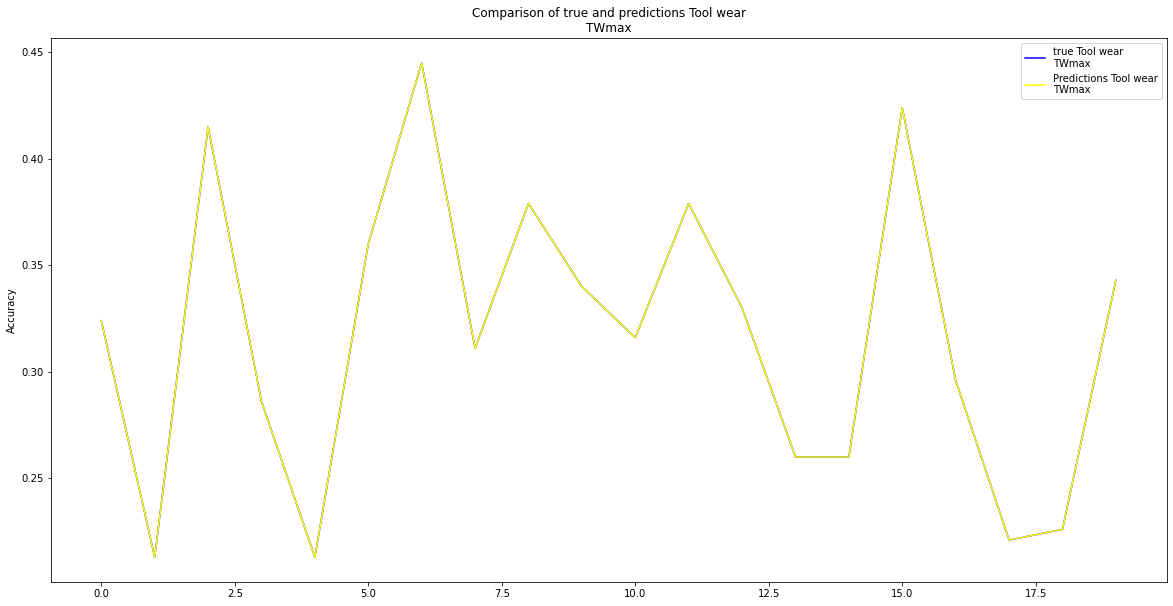

In [67]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
plt.plot(comparison['True Tool wear\nTWmax'].values,color='blue',label='true Tool wear\nTWmax')
plt.plot(comparison['Predicted Tool wear\nTWmax'].values,color='yellow',label='Predictions Tool wear\nTWmax')

plt.title('Comparison of true and predictions Tool wear\nTWmax')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [15]:
#comparison.to_csv(r'hyper_random_forest.csv', index = False, header=True)

In [16]:
confusion_matrix(y_test, pred)

ValueError: continuous is not supported